# Latest Mark 7

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from copy import deepcopy
import shapely.geometry as shapgeo

## Read, Plot Funct

In [2]:
def read_files(ddir):
    images = dict()
    ACCEPTED_FORMAT = ['jpg', 'png']
    for d in sorted(os.listdir(ddir)):
        if d.split('.')[1].lower() in ACCEPTED_FORMAT:
            fname = d.split('.')[0]
            print(f'reading {os.path.join(ddir, d)}...')
            images[fname] = cv2.imread(os.path.join(ddir, d))
            images[fname] = cv2.cvtColor(images[fname], cv2.COLOR_BGR2RGB)
    return images

def display_all(imgs, subs=(10,10), fgsz=(15,18), use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def display_all_with(imgs, cc, subs=(10,10), fgsz=(15,18), use_gray=True):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k][:,:,cc], cmap='gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
            
def save_plots(imgs, suptitle, savedir, subs=(10,10), fgsz=(15,18), use_gray=False):
    fig, axs = plt.subplots(subs[0], subs[1], figsize=fgsz)
    k = 0
    for i in range(subs[0]):
        for j in range(subs[1]):
            axs[i, j].imshow(list(imgs.values())[k], 'gray' if use_gray else None)
            axs[i, j].set_title(list(imgs.keys())[k])
            axs[i, j].axis('off')
            k+=1
    fig.suptitle(suptitle)
    fig.savefig(savedir)
    print(f'Figure is successfully saved at {savedir}')

def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [3]:
POSITIVE = r'/home/tsdhrm/Pictures/thesis/dataset/100DataNew/positive'
NEGATIVE = r'/home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative'
IDEAL = r'/home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/r3_N-13-L_left_half.png'

In [4]:
neg = read_files(NEGATIVE)
ideal = cv2.imread(IDEAL)
ideal = cv2.cvtColor(ideal, cv2.COLOR_BGR2RGB)

reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/001.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/008.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/009.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/010.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/011.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/012.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/015.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/017.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/018.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/021.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/022.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/023.jpg...
reading /home/tsdhrm/Pictures/thesis/dataset/100DataNew/negative/024.jpg...
reading /hom

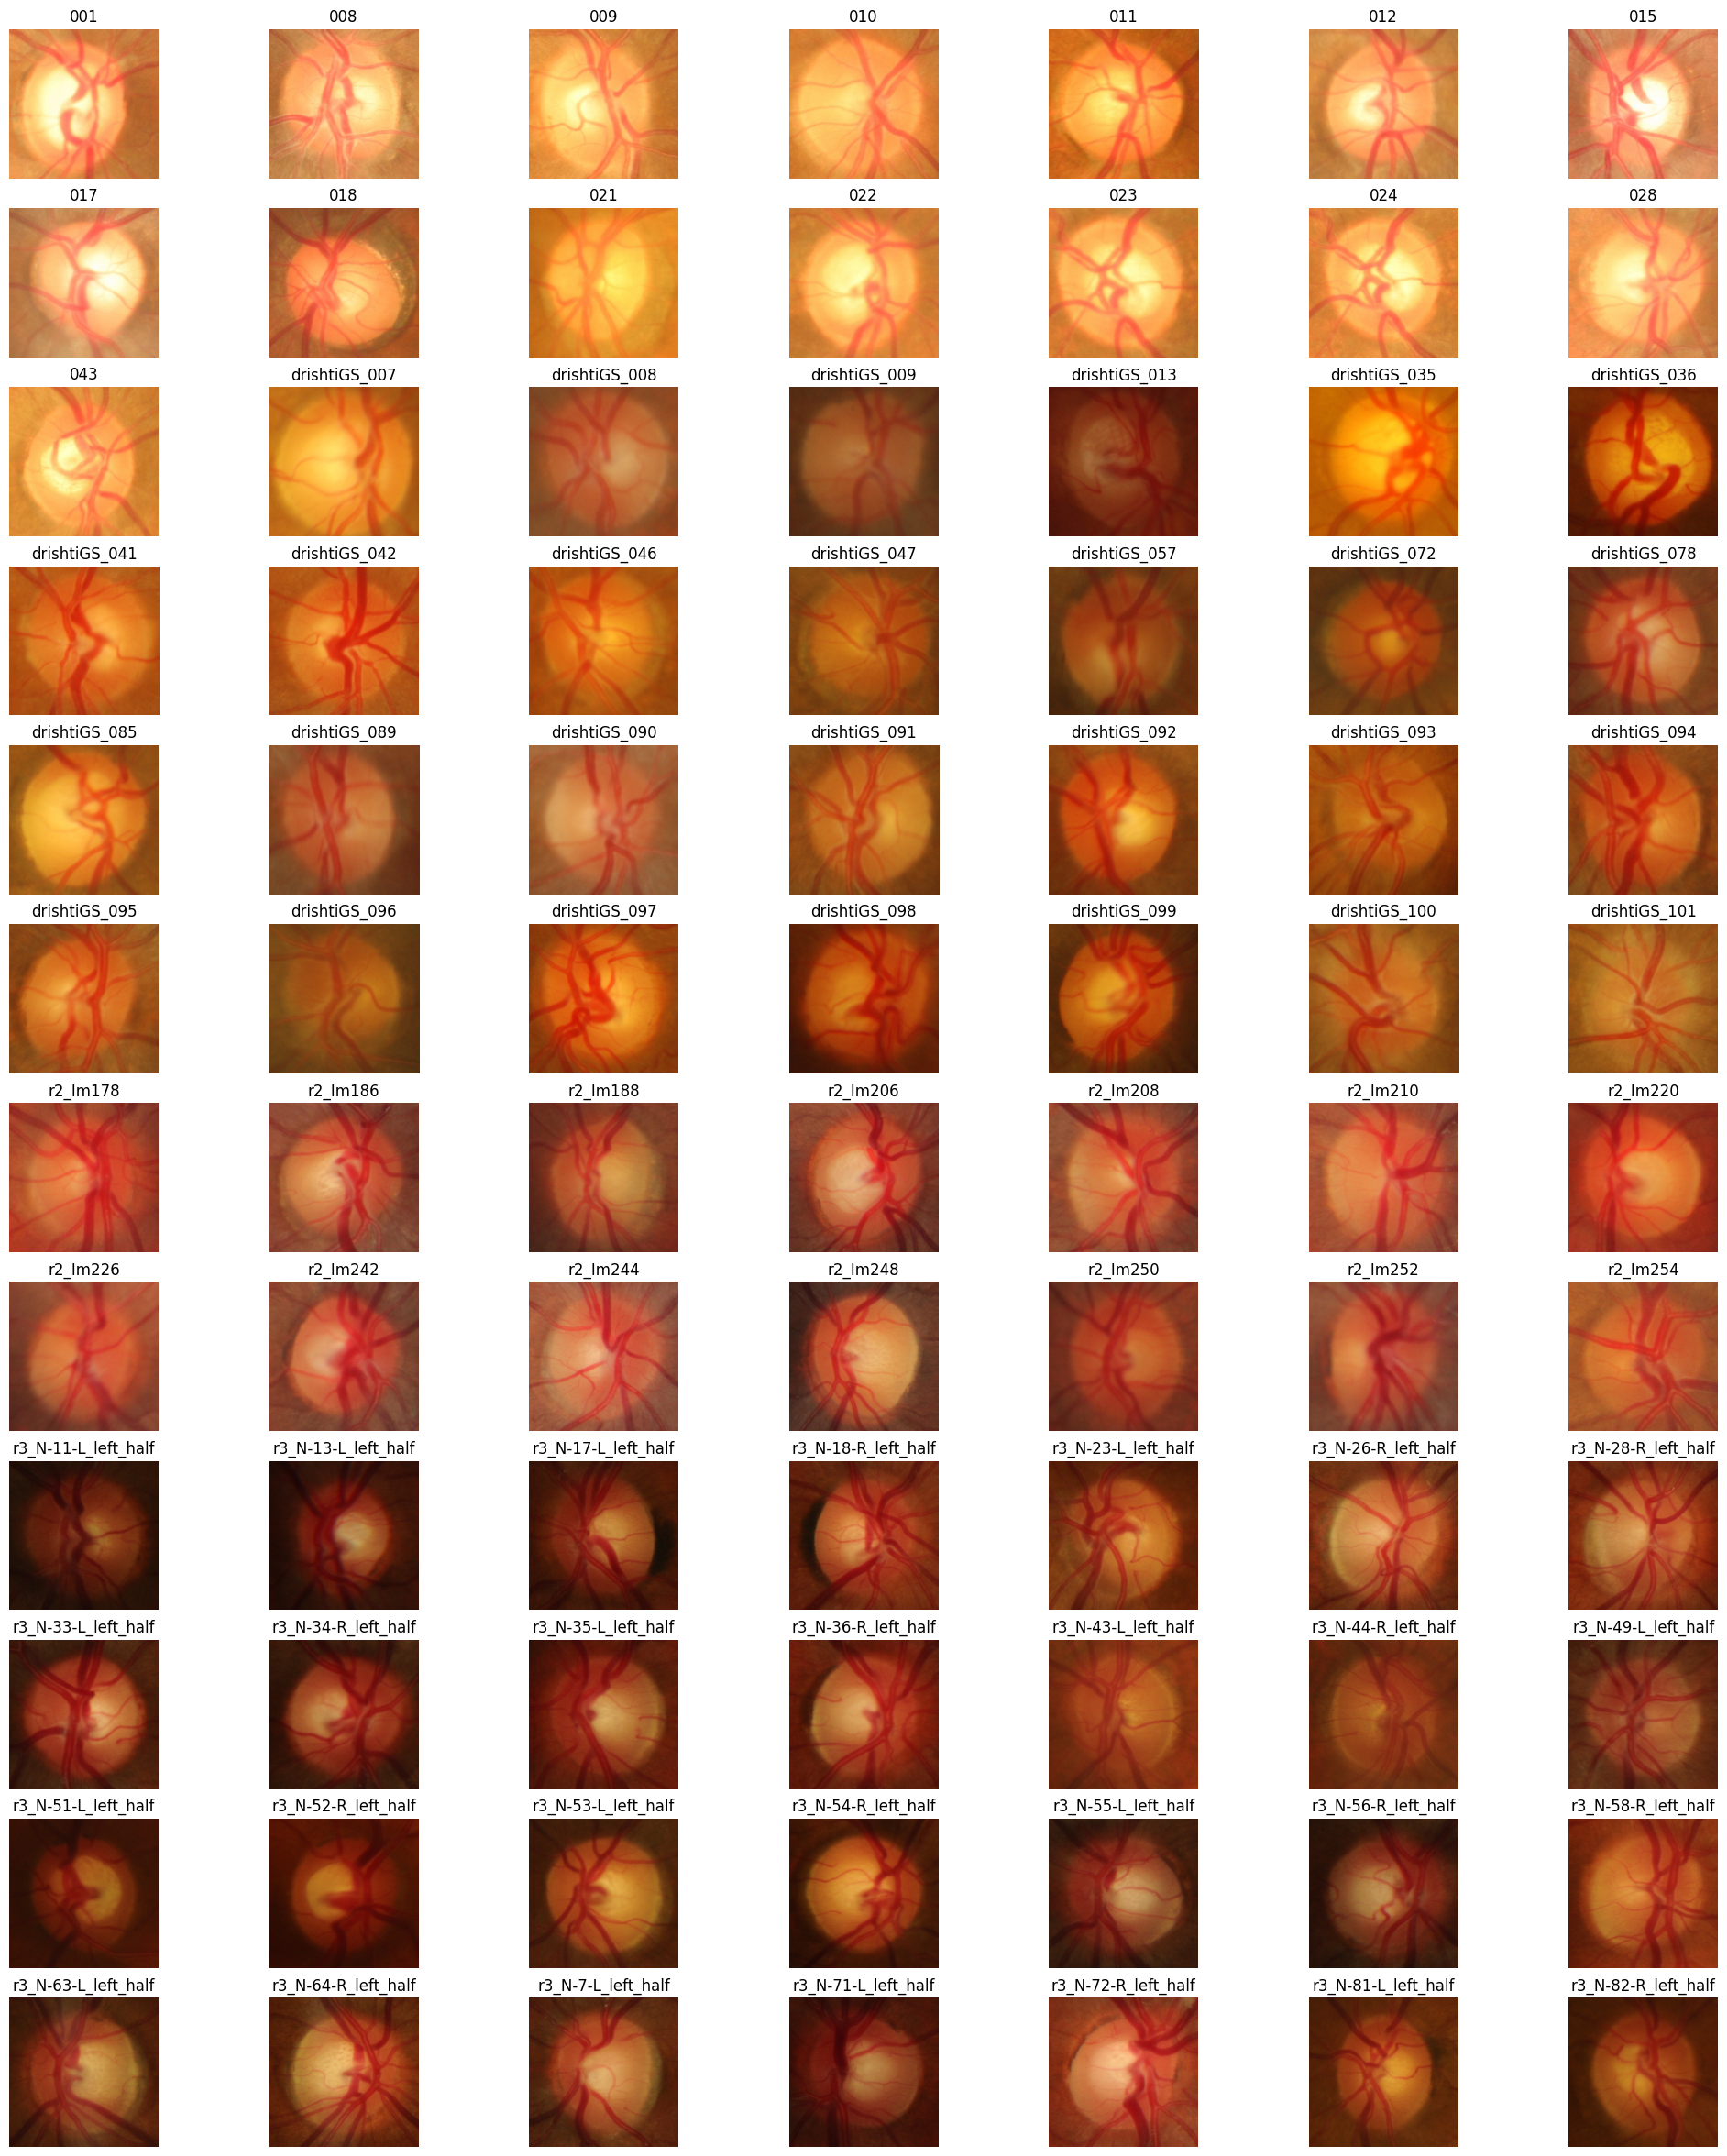

In [5]:
display_all(neg, (12,7), (25,30))